In [1]:
import torch
from sklearn.model_selection import train_test_split
from get_circle_quarter import train
from get_circle_quarter import get_circle, get_quarter
import pandas as pd


class MLPModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_size, output_dim):
        super(MLPModel, self).__init__()
        # TODO: implement your 2-layer MLP here
        self.mlp_1 = torch.nn.Linear(input_dim, hidden_size)    # 输入层
        self.mlp_2 = torch.nn.Linear(hidden_size, output_dim)   # 输出层

    def forward(self, x):
        inputs = torch.tanh(self.mlp_1(x))              # 在输入层使用 ReLU 激活函数
        outputs = torch.sigmoid(self.mlp_2(inputs))     # 在输出层使用 Sigmoid 激活函数
        return outputs


if __name__ == '__main__':

    ###############################
    ####     DO NOT MODIFY    #####
    ###############################
    input_dim = 2  # Two inputs x1 and x2
    output_dim = 1  # Two possible outputs

    # TODO: change this to 0/1 to try two cases
    use_circle_quarter = 0

    ###############################
    ####     DO NOT MODIFY    #####
    ###############################
    if use_circle_quarter == 0:
        X, y = get_circle()
    elif use_circle_quarter == 1:
        X, y = get_quarter()
    else:
        assert 1 == 2, 'bad choice'
    # Get data, don't modify
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

    # TODO: you may modify hidden_size and learning_rate
    # hidden_size = 3
    lr = 0.1

    results = []
    figs = []
    # TODO: implement the MLPModel
    for hidden_size in range(1, 11):
        model = MLPModel(input_dim, hidden_size, output_dim)
        result = train(X_train, X_test, y_train, y_test, learning_rate=lr, model=model)
        results.append(result)
        figs.append()
    results = pd.DataFrame(results, index=range(1,11))
    


Training Epochs: 100%|██████████| 20001/20001 [00:06<00:00, 3266.13it/s]


In [2]:
results

,iter,loss_train,accuracy_train,loss_test,accuracy_test
1,20000,0.570347,60.895522,0.587750,60.606061
2,20000,0.436019,77.313433,0.461233,73.939394
3,20000,0.095380,96.865672,0.073534,97.575758
4,20000,0.086525,97.164179,0.065055,97.575758
5,20000,0.085416,97.014925,0.063881,97.575758
6,20000,0.074414,98.059701,0.050577,99.393939
7,20000,0.061938,98.358209,0.048936,98.484848
8,20000,0.050203,99.402985,0.031153,99.393939
9,20000,0.064316,98.955224,0.049706,98.787879
10,20000,0.047622,99.701493,0.026067,99.696970


<Axes: title={'center': 'Training and Testing Metrics vs. Hidden Layer Size'}>

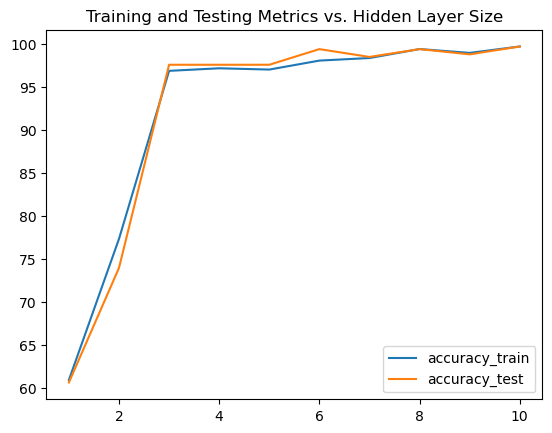

In [8]:
results.plot(kind='line', y=['accuracy_train', 'accuracy_test'],  title='Training and Testing Metrics vs. Hidden Layer Size')

In [3]:
print('Final accuracy:', result['accuracy_train'])

for k, v in model.state_dict().items():
    print(k, v)


Final accuracy: 97.01492537313433
mlp_1.weight tensor([[-3.0221, -3.1236],
        [-1.0793,  3.8868],
        [ 4.0804, -1.3471]])
mlp_1.bias tensor([-0.5905, -0.0770, -0.4374])
mlp_2.weight tensor([[-4.3084, -3.9987, -4.3152]])
mlp_2.bias tensor([14.4099])


In [23]:
sqrt(2)/2.0

0.7071067811865476

In [28]:
from numpy import sqrt


model(torch.tensor([[0.6, 0.6]]))

tensor([[0.8346]], grad_fn=<SigmoidBackward0>)

In [8]:
for k, v in model.state_dict().items():
    print(k, v)

mlp_1.weight tensor([[ 1.1644, -3.9439],
        [-4.1421,  1.1981],
        [ 2.9060,  3.2477]])
mlp_1.bias tensor([ 0.2247, -0.4072, -0.5190])
mlp_2.weight tensor([[-4.0058, -4.2621, -4.3181]])
mlp_2.bias tensor([15.3210])
